**ML2 : homework 06**

Ladino Álvarez Ricardo Arturo.

2020-17-09

Parts of the notebook

* **Linear Regression**

 1. *Consumo de alcohol en ciudades para predecir la muerte por cirrosis (wine_death)*

 La base de datos se descarga en "https://github.com/GeorgeSeif/Python-Machine-Learning/blob/master/wine_data.csv"


In [ ]:
### Librerias a usar.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


1. **Consumo de alcohol en ciudades para predecir la muerte por cirrosis (wine_death))**

 - **Solución**:

In [ ]:
wine_death = pd.read_csv("wine_death.csv")
wine_death_c= wine_death.copy()
wine_death_c.head(5)

,idx,one,urban_population,late_births,wine_consumption,liquor_consumption,cirrhosis_death_rate
0,1,1,44,33.2,5,30,41.2
1,2,1,43,33.8,4,41,31.7
2,3,1,48,40.6,3,38,39.4
3,4,1,52,39.2,7,48,57.5
4,5,1,71,45.5,11,53,74.8


<Figure size 432x288 with 0 Axes>

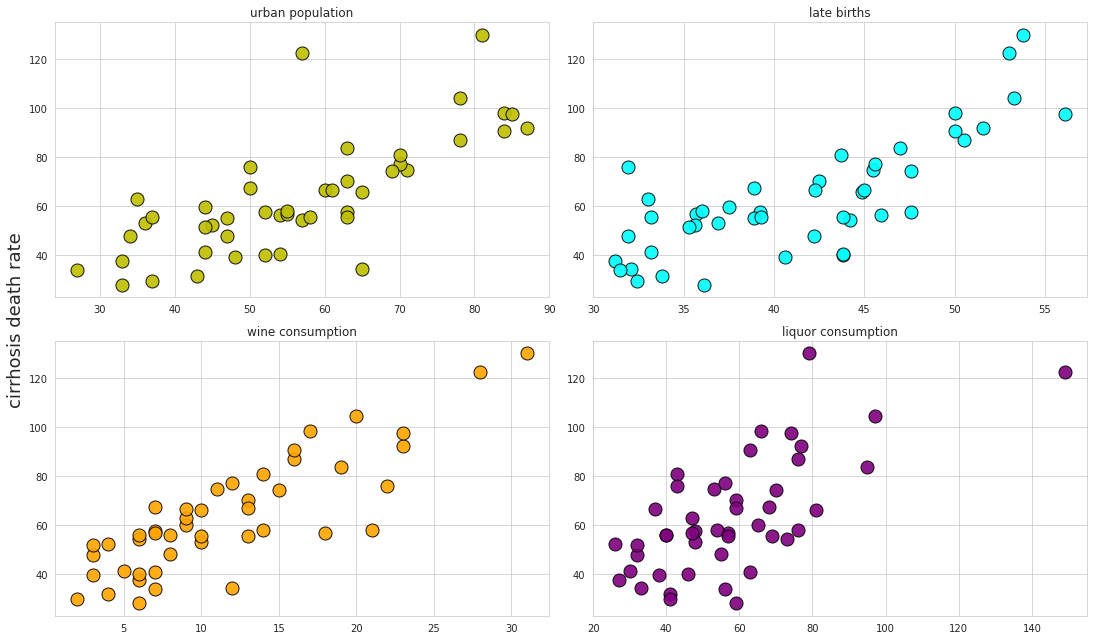

In [ ]:
plt.figure(1)
sns.set_style("whitegrid")
f, axarr = plt.subplots(2, 2, figsize=(15, 9))
y = wine_death_c.cirrhosis_death_rate.values

axarr[0, 0].scatter(wine_death_c.urban_population.values, y, s = 170, color ='y', alpha = 0.9,edgecolor='black', linewidth=1 )
axarr[0, 0].set_title('urban population')

axarr[0, 1].scatter(wine_death_c.late_births.values, y, s = 170, color ='cyan', alpha = 0.9,edgecolor='black', linewidth=1)
axarr[0, 1].set_title('late births')

axarr[1, 0].scatter(wine_death_c.wine_consumption.values, y,s = 170, color ='orange', alpha = 0.9,edgecolor='black', linewidth=1)
axarr[1, 0].set_title('wine consumption')

axarr[1, 1].scatter(wine_death_c.liquor_consumption.values, y, s = 170, color ='purple', alpha = 0.9,edgecolor='black', linewidth=1)
axarr[1, 1].set_title('liquor consumption')

f.text(-0.01, 0.5, 'cirrhosis death rate', va='center', rotation='vertical', fontsize = 18)
plt.tight_layout()

plt.show()

In [ ]:
## Creación de matrices a usar "X -> explicativas", "Y -> Predictiva"
X = wine_death_c.iloc[:,2:6]
ones = np.ones([X.shape[0],1])
X = np.concatenate((ones,X),axis=1)
X=np.around(X, decimals=3)
Y = wine_death_c.iloc[:,6:7].to_numpy()
print(f'Shape Matriz X : {X.shape}')
print(f'Shape Vector Y : {Y.shape}')

Shape Matriz X : (46, 5)
Shape Vector Y : (46, 1)


In [ ]:
w = np.linalg.inv(X.T.dot(X)).dot((X.T.dot(y)))
L = [w.T.dot(x) for x in X]
L = [w.T.dot(x) for x in X]
LL= np.asarray(L)
L2 = LL.reshape(LL.shape[0], 1)
brain_ww = np.concatenate((X,Y,L2), axis=1)
print(f'W shape :  {w.shape}')
print(f'W value : {w}')
print(f'Matriz resultante shape :  {brain_ww.shape}')

W shape :  (5,)
W value : [-13.9631001    0.0982859    1.14837707   1.85786103   0.04817018]
Matriz resultante shape :  (46, 7)


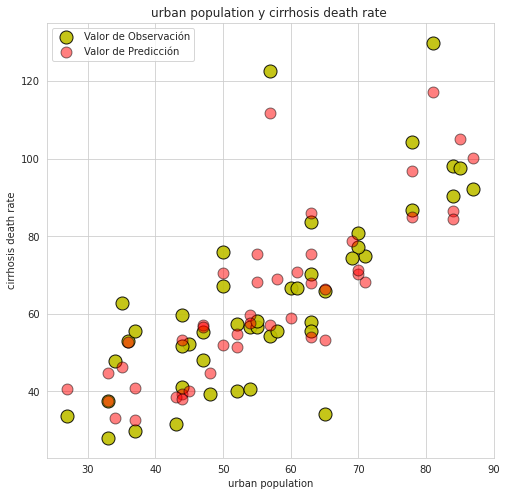

MSE  : 100.24149749295779


In [ ]:
plt.figure(figsize=(8,8))

plt.scatter(X[:, 1], Y, c = 'y',s = 170, alpha = 0.9,edgecolor='black', linewidth=1, label='Valor de Observación')
plt.scatter(X[:, 1], L, c = 'r',s = 120, alpha = 0.5,edgecolor='black',linewidth=1, label='Valor de Predicción')
plt.title('urban population y cirrhosis death rate ')
plt.xlabel('urban population')
plt.ylabel('cirrhosis death rate')
plt.legend()
plt.show()
pred_comp = [w.T.dot(x) for x in X]
print("MSE  :",mean_squared_error(Y, pred_comp))

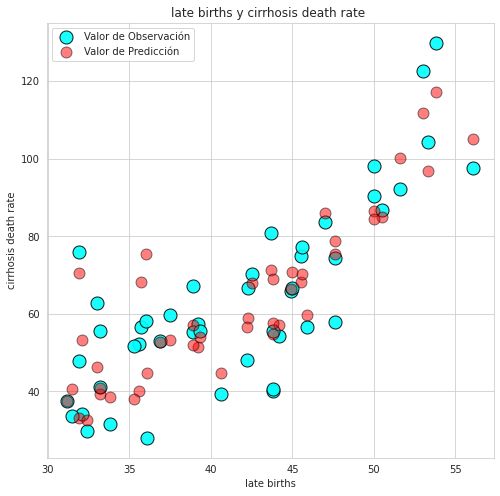

MSE  : 100.24149749295779


In [ ]:
plt.figure(figsize=(8,8))

plt.scatter(X[:, 2], Y, c = 'cyan',s = 170, alpha = 0.9,edgecolor='black', linewidth=1, label='Valor de Observación')
plt.scatter(X[:, 2], L, c = 'red',s = 120, alpha = 0.5,edgecolor='black',linewidth=1, label='Valor de Predicción')
plt.title('late births y cirrhosis death rate ')
plt.xlabel('late births')
plt.ylabel('cirrhosis death rate')
plt.legend()
plt.show()
pred_comp = [w.T.dot(x) for x in X]
print("MSE  :",mean_squared_error(Y, pred_comp))

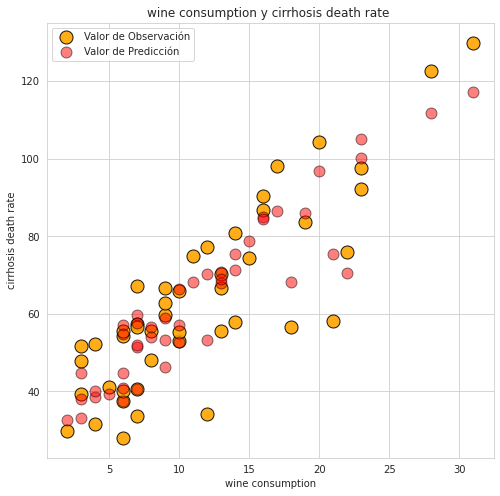

MSE  : 100.24149749295779


In [ ]:
plt.figure(figsize=(8,8))

plt.scatter(X[:, 3], Y, c = 'orange',s = 170, alpha = 0.9,edgecolor='black', linewidth=1, label='Valor de Observación')
plt.scatter(X[:, 3], L, c = 'red',s = 120, alpha = 0.5,edgecolor='black',linewidth=1, label='Valor de Predicción')
plt.title('wine consumption y cirrhosis death rate ')
plt.xlabel('wine consumption')
plt.ylabel('cirrhosis death rate')
plt.legend()
plt.show()
pred_comp = [w.T.dot(x) for x in X]
print("MSE  :",mean_squared_error(Y, pred_comp))

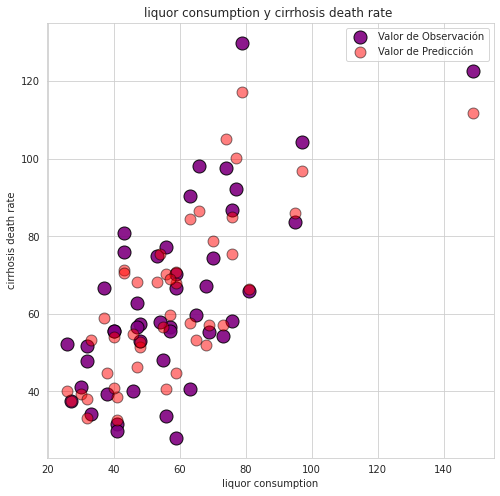

MSE  : 100.24149749295779


In [ ]:
plt.figure(figsize=(8,8))

plt.scatter(X[:, 4], Y, c = 'purple',s = 170, alpha = 0.9,edgecolor='black', linewidth=1, label='Valor de Observación')
plt.scatter(X[:, 4], L, c = 'red',s = 120, alpha = 0.5,edgecolor='black',linewidth=1, label='Valor de Predicción')
plt.title('liquor consumption y cirrhosis death rate ')
plt.xlabel('liquor consumption')
plt.ylabel('cirrhosis death rate')
plt.legend()
plt.show()
pred_comp = [w.T.dot(x) for x in X]
print("MSE  :",mean_squared_error(Y, pred_comp))